## Linear Regression

***Linear regression*** is a basic predictive analytics technique that uses historical data to predict an output variable.
Linear regression models have many real-world applications in an array of industries such as economics (e.g. predicting growth), business (e.g. predicting product sales, employee performance), social science (e.g. predicting political leanings from gender or race), healthcare (e.g. predicting blood pressure levels from weight, disease onset from biological factors), and more.

There are two kinds of variables in a linear regression model:

The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
The output variable is the variable that we want to predict. It is commonly referred to as Y.

To estimate Y using linear regression, we assume the equation:

**Yₑ = mX + c**

where Yₑ is the estimated or predicted value of Y based on our linear equation.

A linear function has one independent variable and one dependent variable. The independent variable is x and the dependent variable is y.

- c is the constant term or the y intercept. It is the value of the dependent variable when x = 0.
- m is the coefficient of the independent variable. It is also known as the slope and gives the rate of change of the dependent variable.

Our goal is to find statistically significant values of the parameters m and c that minimise the difference between Y and Yₑ.

If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X.

Ordinary Least Squares
The objective of the least squares method is to find values of a and b that minimise the sum of the squared difference between Y and Yₑ:

![](img/LinearRegression/OLS.png)

**Multiple Linear Regression**

Linear suggests that the relationship between dependent and independent variable can be expressed in a straight line.

The equation of the line is y = mx + c. One dimension is y-axis, another dimension is x-axis. It can be plotted in a two-dimensional plane.

The generalization of this relationship can be expressed as:

**y = f(x)**

It means:

*Define y as a function of x. i.e. define the dependent variable as a function of the independent variable.*

What if the dependent variable needs to be expressed in terms of more than one independent variable? The generalized function becomes:

**y = f(x, z)** i.e. express y as some function/combination of x and z.

There are three dimensions now y-axis, x-axis and z-axis. It can be plotted as:

![](img/LinearRegression/Multiple2.png)

Now we have more than one dimension (x and z). We have an additional dimension. We want to express y as a combination of x and z.

For a simple regression linear model a straight line expresses y as a function of x. Now we have an additional dimension (z). What will happen if an additional dimension is added to a line? It becomes a plane.

![](img/LinearRegression/Multiple1.png)

The plane is the function that expresses y as a function of x and z. Extrapolating the linear regression equation, it can now be expressed as:

**y = m1.x + m2.z+ c**

-  y is the dependent variable i.e. the variable that needs to be estimated and predicted.
-  x is the first independent variable i.e. the variable that is controllable. It is the first input.
-  m1 is the slope of x1. It determines what will be the angle of the line (x).
-  z is the second independent variable i.e. the variable that is controllable. It is the second input.
-  m2 is the slope of z. It determines what will be the angle of the line (z).
-  c is the intercept. A constant that determines the value of y when x and z are 0.

This is the genesis of the multivariate linear regression model. There are more than one input variables used to estimate the target. A model with two input variables can be expressed as:

**y = β0 + β1.x1 + β2.x2**

What if we had more variables as inputs? Human visualization capabilities are limited here. It can only visualize three dimensions. In machine learning world, there can be many dimensions. A multivariate regression model can be expressed as:

**y = β0 + β1.x1 + β2.x2 +….. + βn.xn**

***Great sources:***
- https://towardsdatascience.com/data-science-simplified-part-5-multivariate-regression-models-7684b0489015
- https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
- https://www.youtube.com/watch?v=2Sb1Gvo5si8&index=13&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Example: Sallary Vs. Years of Work Experience

Defining variables:
X: the first column which contains Years Experience array
y: the last column which contains Salary array

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/salary.csv')
X = dataset.iloc[:, :-1].values #get a copy of dataset exclude last column
y = dataset.iloc[:, 1].values #get array of dataset in column 1st

We will split our dataset (total 30 observations) into 2 sets: training set which used for training and test set which used for testing:

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

**test_size=1/3:** we will split our dataset (30 observations) into 2 parts (training set, test set) and the ratio of test set compare to dataset is 1/3 (10 observations will be put into the test set. You can put it 1/2 to get 50% or 0.5, they are the same. We should not let the test set too big; if it’s too big, we will lack of data to train. Normally, we should pick around 5% to 30%.

**train_size:** if we use the test_size already, the rest of data will automatically be assigned to train_size.

**random_state:** this is the seed for the random number generator. We can put an instance of the RandomState class as well. If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

In [3]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**regressor = LinearRegression():** our training model which will implement the Linear Regression.

**regressor.fit:** in this line, we pass the X_train which contains value of Year Experience and y_train which contains values of particular Salary to form up the model. This is the training process.

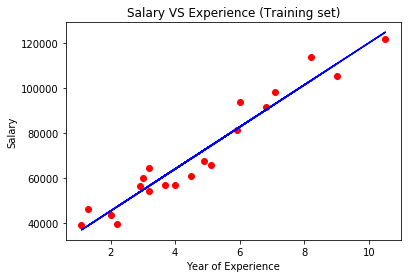

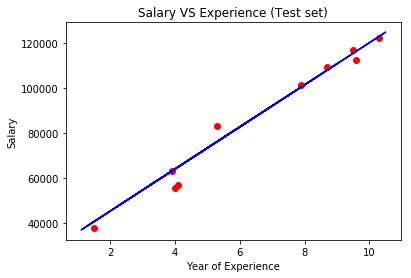

In [4]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

Comparing these two plots, we can see the blue lines are the same direction. Our model is good to use now.

In [5]:
# Predicting the result of 5 Years Experience
y_pred = regressor.predict(5)

print(y_pred)

[73545.90445964]


Our model suggests us that we can offer to an employee with 5 years of experience a sallary of $73.545,90!

## Example: Fortune 1000 Companies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
companies = pd.read_csv("Data/1000Companies.csv")

X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


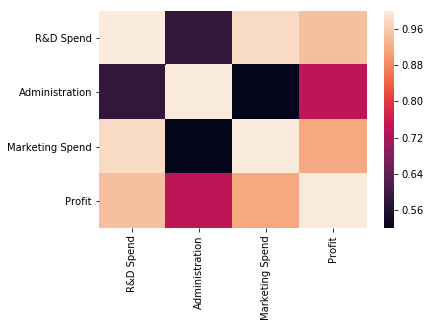

In [8]:
 # data visualization  - correlation matrix
sns.heatmap(companies.corr())

In [9]:
# Encoding categorical data
       # the third column in the dataset is categorical
       # linear regression does not know how to process categorical data
       # we need to change values to numbers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [10]:
# this line changes categorical values to numbers
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [11]:
 # One Hot Encoder
       # makes binarization of integer categories
       # creates a new column for every category
           # puts 1 if is in category
           # 0 if isn't
onehotencoder = OneHotEncoder(categorical_features = [3])


In [12]:
 # preparates the data to be a row of numbers
X = onehotencoder.fit_transform(X).toarray()

In [13]:
# Avoiding dummy variable trap:
X = X[:, 1:]

In [14]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Fitting Multiple Linear Regression Model to Training set:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Making predictions
y_pred = model_fit.predict(X_test)

In [17]:
# Calculating coefficients and the intercept
print(model_fit.coef_)
print(model_fit.intercept_)

[-8.60307041e+02  2.06997876e+02  5.70356608e-01  1.12931742e+00
  6.64034102e-02]
-80675.99624371964


In [18]:
# Calculating the R squared value
       # tells us how good the prediction is
       # not a percentage, but should be above 0.9
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9824628473540985

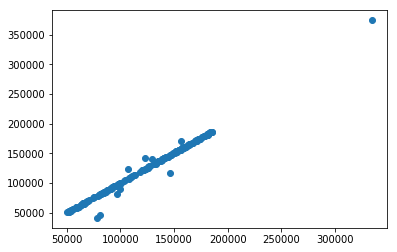

In [19]:
# Visualization
plt.scatter(y_test,y_pred)